In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda, Reshape, Conv2D, Conv2DTranspose, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K



In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 165s 1us/step


In [3]:
latent_dim = 100
input_shape = (32, 32, 3)


In [4]:
inputs = Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

In [5]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

In [6]:
decoder_input = Input(shape=(latent_dim,))
x = Dense(8 * 8 * 64, activation='relu')(decoder_input)
x = Reshape((8, 8, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)



In [7]:
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, outputs, name='decoder')
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

In [19]:
def vae_loss(inputs, outputs):
    reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs)) * 32 * 32 * 3
   
    return K.mean(reconstruction_loss )


In [20]:
vae.compile(optimizer='adam', loss=vae_loss)


In [21]:
vae.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 108.3207 - val_loss: 34.0452
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 30.2909 - val_loss: 24.4675
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 24.0857 - val_loss: 21.7455
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 20.6693 - val_loss: 19.6751
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 19.7283 - val_loss: 19.1167
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 19.1611 - val_loss: 18.8838
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 18.8590 - val_loss: 18.9347
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 18.4360 - val_loss: 18.6520
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 18.3892 - val_loss: 19.3441
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 18.2105 - val_loss: 18.6003


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

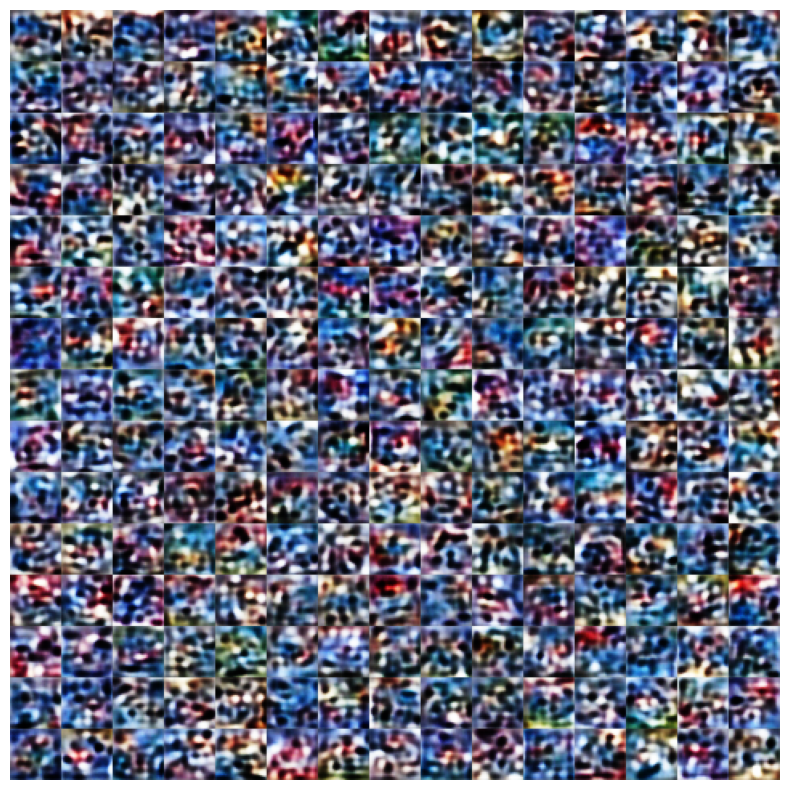

In [24]:
n = 15
figure = np.zeros((32 * n, 32 * n, 3))
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.random.normal(size=(1, latent_dim))
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(32, 32, 3)
        figure[i * 32: (i + 1) * 32, j * 32: (j + 1) * 32] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.axis('off')
plt.show()